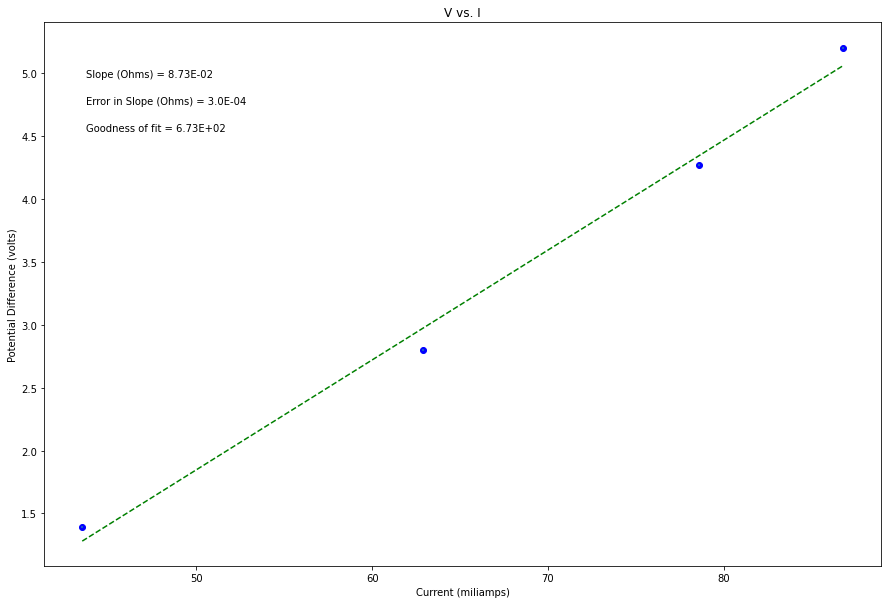

In [3]:
#Intro to Electronics
import math as math
import numpy as np

#Current Measurements (milliamps)
I1 = 43.5
I2 = 62.9
I3 = 78.6
I4 = 86.8

#Voltage Measurements (Volts)
V1 = 1.39
V2 = 2.80
V3 = 4.27
V4 = 5.20

#Uncertainties
dV = 0.01

%matplotlib inline

#Import packages and libraries needed and give them shortcut names

import matplotlib.pyplot as plt

#Data Section - Create Arrays for data. Perform necessary calculations
current = np.array([I1, I2, I3, I4])
voltage = np.array([V1, V2, V3, V4]) 


#Create arrays for uncertainties 
err_voltage = np.array([dV, dV, dV, dV])


#Re-assign variables as x, y, dy so that the following code may remain generic
x = current 
y = voltage
dy = err_voltage 

 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1 / dy ** 2)) * (sum(x ** 2 / dy ** 2)) - (sum(x / dy ** 2)) ** 2
    return D
 
D = Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope
#and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 

plt.xlabel('Current (miliamps)')
plt.ylabel('Potential Difference (volts)')
plt.title('V vs. I')
 
plt.errorbar(x, y, yerr=dy, xerr = None, fmt = "none")
 
plt.annotate('Slope (Ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (Ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
